In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
data=pd.read_csv("LSTM_train_week4.csv",index_col='Date')
data

,Price,Open,High,Low,Volume,Chg%,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
Date,,,,,,,,,,,,,,
4-Jan-21,47.62,48.40,49.83,47.18,528.53K,-1.85%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5-Jan-21,49.93,47.38,50.20,47.24,643.19K,4.85%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6-Jan-21,50.63,49.82,50.94,49.48,509.37K,1.40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7-Jan-21,50.83,50.53,51.28,50.39,369.29K,0.40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8-Jan-21,52.24,50.93,52.75,50.81,499.42K,2.77%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23-Nov-22,77.94,81.08,81.95,76.83,379.15K,-3.72%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24-Nov-22,77.95,77.53,78.19,76.92,0,0.01%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25-Nov-22,76.28,77.51,79.90,76.22,266.45K,-2.14%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:


data=data[['Price']]

data

,Price
Date,
4-Jan-21,47.62
5-Jan-21,49.93
6-Jan-21,50.63
7-Jan-21,50.83
8-Jan-21,52.24
...,...
23-Nov-22,77.94
24-Nov-22,77.95
25-Nov-22,76.28


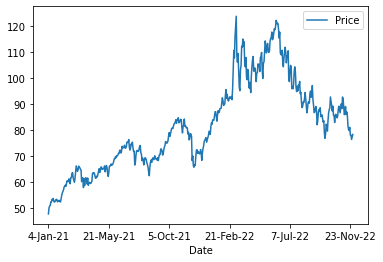

In [7]:
data.plot()


In [8]:
len(data)

505

In [36]:
train=data.iloc[0:480]
test=data.iloc[480:]


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
scaler.fit(train)
scaled_train=scaler.transform(train)           
scaled_test=scaler.transform(test)

In [39]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [84]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [85]:
X,y = generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03036278 0.03956362 0.04219243]
Predict this y: 
 [[0.06072555]]


In [86]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
     

In [87]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
     

In [88]:
model.fit(generator,epochs=50)

Epoch 1/50
477/477 [==============================] - 3s 4ms/step - loss: 0.0228
Epoch 2/50
477/477 [==============================] - 2s 4ms/step - loss: 0.0020
Epoch 3/50
477/477 [==============================] - 2s 4ms/step - loss: 0.0019
Epoch 4/50
477/477 [==============================] - 2s 4ms/step - loss: 0.0018
Epoch 5/50
477/477 [==============================] - 2s 4ms/step - loss: 0.0019
Epoch 6/50
477/477 [==============================] - 2s 4ms/step - loss: 0.0020
Epoch 7/50
477/477 [==============================] - 2s 4ms/step - loss: 0.0018
Epoch 8/50
477/477 [==============================] - 2s 4ms/step - loss: 0.0018
Epoch 9/50
477/477 [==============================] - 2s 4ms/step - loss: 0.0017
Epoch 10/50
477/477 [==============================] - 2s 4ms/step - loss: 0.0017
Epoch 11/50
477/477 [==============================] - 2s 4ms/step - loss: 0.0016
Epoch 12/50
477/477 [==============================] - 2s 4ms/step - loss: 0.0016
Epoch 13/50
477/477 [====

In [89]:
# scaled_tryit=scaled_test[0:5]
# trythis=scaled_tryit.reshape(1,10,1)

In [90]:
#model.predict(trythis)

In [91]:
scaled_test[10]

array([0.50223449])

In [92]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 20ms/step


In [93]:
test_predictions

[array([0.49782282], dtype=float32),
 array([0.50044197], dtype=float32),
 array([0.50344634], dtype=float32),
 array([0.5064333], dtype=float32),
 array([0.5094167], dtype=float32),
 array([0.51241785], dtype=float32),
 array([0.515435], dtype=float32),
 array([0.5184688], dtype=float32),
 array([0.52152133], dtype=float32),
 array([0.52459407], dtype=float32),
 array([0.5276887], dtype=float32),
 array([0.5308069], dtype=float32),
 array([0.53395045], dtype=float32),
 array([0.537126], dtype=float32),
 array([0.54034215], dtype=float32),
 array([0.54359984], dtype=float32),
 array([0.5469012], dtype=float32),
 array([0.55024856], dtype=float32),
 array([0.55364436], dtype=float32),
 array([0.55709106], dtype=float32),
 array([0.56059146], dtype=float32),
 array([0.56414825], dtype=float32),
 array([0.5677642], dtype=float32),
 array([0.5714427], dtype=float32),
 array([0.5751869], dtype=float32)]

In [94]:
truepredictions=scaler.inverse_transform(test_predictions)
test['prediction']=truepredictions



<ipython-input-94-c64ac945ba4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=truepredictions


In [95]:
test

,Price,prediction
Date,,
26-Oct-22,87.91,85.494360
27-Oct-22,89.08,85.693625
28-Oct-22,87.90,85.922198
31-Oct-22,86.53,86.149446
1-Nov-22,88.37,86.376422
2-Nov-22,90.00,86.604750
3-Nov-22,88.17,86.834293
4-Nov-22,92.61,87.065106
7-Nov-22,91.79,87.297343


In [96]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Price'],test['prediction']))
print(rmse)

7.308555070128715


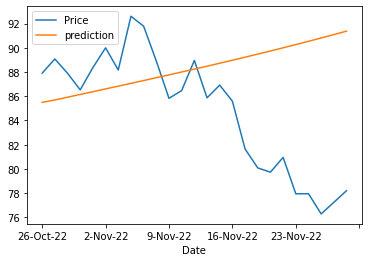

In [97]:
test.plot()

In [98]:
Next_thirtydays_predictions = []

first_eval_batch = scaled_test[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(30):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    Next_thirtydays_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


In [99]:
Next_thirtydays_predictions=scaler.inverse_transform(Next_thirtydays_predictions)

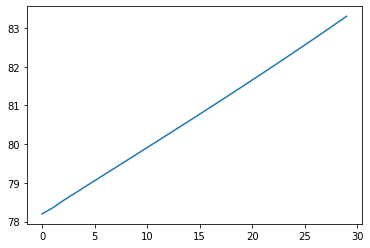

In [100]:
plt.plot(Next_thirtydays_predictions)